# Data
[Data Gambar Mobil](https://drive.google.com/drive/folders/18HIgCVfkBPGI51vKG-1efLqKjNTNRFE7?usp=drive_link)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, MobileNetV3Large, MobileNetV2, DenseNet121,EfficientNetB0,VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Convolution2D, Flatten
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
import os
from sklearn.metrics import classification_report

In [3]:
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif', '.webp')):
            try:
                img = Image.open(os.path.join(directory, filename))
                img = img.convert("RGB")
                img = img.resize((224, 224))
                images.append(np.array(img))
            except Exception as e:
                print(f"Error loading image {filename}: {e}")
    return images

In [4]:
gambar_mobil = load_images('/content/drive/MyDrive/Data_UAS/mobil')
gambar_bus = load_images('/content/drive/MyDrive/Data_UAS/bus')
gambar_truk = load_images('/content/drive/MyDrive/Data_UAS/truk')

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [5]:
print("Jumlah gambar bus:", len(gambar_bus))
print("Jumlah gambar mobil:", len(gambar_mobil))
print("Jumlah gambar truk:", len(gambar_truk))

Jumlah gambar bus: 660
Jumlah gambar mobil: 642
Jumlah gambar truk: 659


In [6]:
import numpy as np

labels_mobil = np.zeros(len(gambar_mobil))
labels_bus = np.ones(len(gambar_bus))
labels_truk = np.full(len(gambar_truk), 2)

images = np.concatenate((gambar_mobil, gambar_bus, gambar_truk))
labels = np.concatenate((labels_mobil, labels_bus, labels_truk))

images = np.array(images)
labels = np.array(labels)

print("Jumlah gambar total:", len(images))
print("Jumlah label total:", len(labels))

Jumlah gambar total: 1961
Jumlah label total: 1961


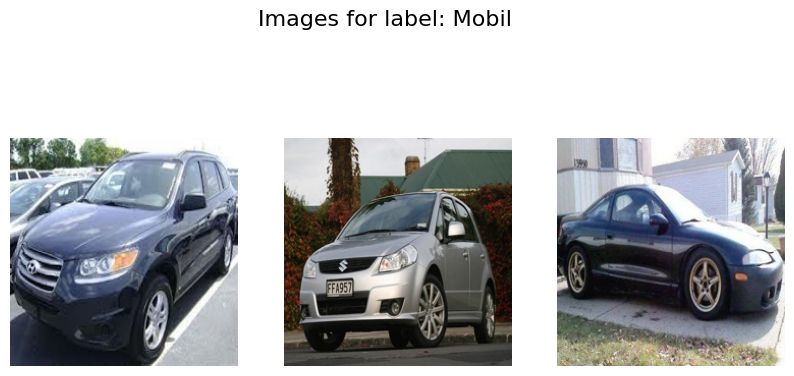

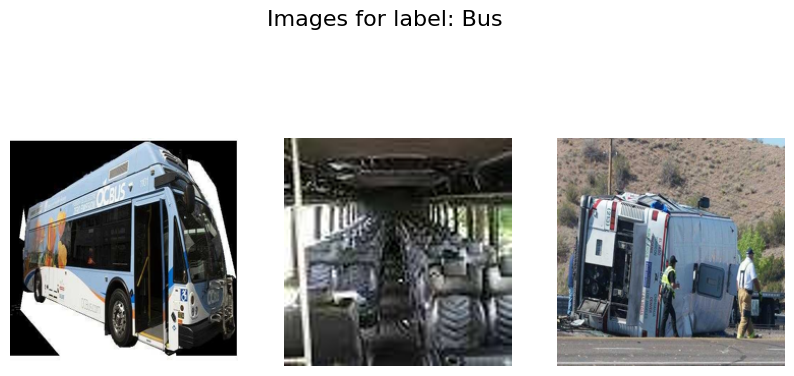

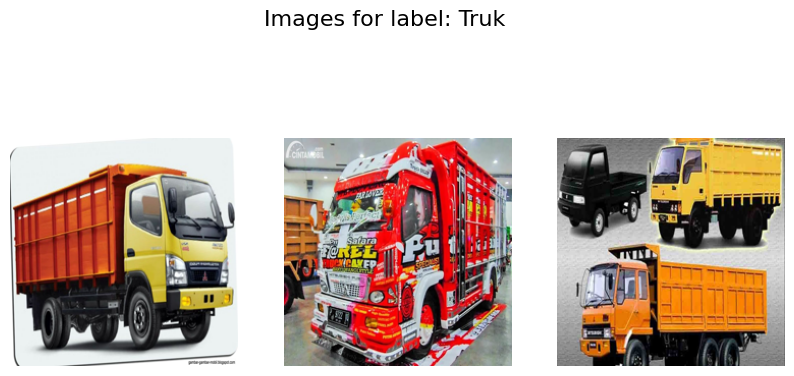

In [7]:
import matplotlib.pyplot as plt
import random

def show_images_by_label(images, labels, num_images_per_label=3):
    """Displays random images from each category."""

    unique_labels = np.unique(labels)
    label_names = {
        0: "Mobil",
        1: "Bus",
        2: "Truk"
    }

    for label in unique_labels:
        label_indices = np.where(labels == label)[0]

        selected_indices = random.sample(list(label_indices), min(num_images_per_label, len(label_indices)))

        plt.figure(figsize=(10, 5))
        plt.suptitle(f"Images for label: {label_names[label]}", fontsize=16)

        for i, index in enumerate(selected_indices):
            plt.subplot(1, num_images_per_label, i + 1)
            plt.imshow(images[index])
            plt.axis('off')
        plt.show()

show_images_by_label(images, labels)

In [9]:
from sklearn.model_selection import train_test_split

# Train-test split
# Replace X and y with images and labels respectively
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

In [10]:
# Menampilkan shape data
print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (1568, 224, 224, 3)
Shape y_train: (1568,)
Shape X_test: (393, 224, 224, 3)
Shape y_test: (393,)


# ResNetV50

In [11]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
resnet_model = Sequential()
resnet_model.add(base_model)
resnet_model.add(GlobalAveragePooling2D())
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(3, activation='softmax'))  # 3 output classes

# Compile the resnet_model
resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
resnet_history = resnet_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 42s 514ms/step - accuracy: 0.6990 - loss: 0.8077 - val_accuracy: 0.9262 - val_loss: 0.1790
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 366ms/step - accuracy: 0.9144 - loss: 0.2301 - val_accuracy: 0.9211 - val_loss: 0.2107
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 366ms/step - accuracy: 0.9242 - loss: 0.2046 - val_accuracy: 0.9288 - val_loss: 0.1689
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 368ms/step - accuracy: 0.9184 - loss: 0.2092 - val_accuracy: 0.9466 - val_loss: 0.1408
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 378ms/step - accuracy: 0.9378 - loss: 0.1705 - val_accuracy: 0.9517 - val_loss: 0.1248
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 368ms/step - accuracy: 0.9322 - loss: 0.1555 - val_accuracy: 0.9491 - val_loss: 0.1460
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 378ms/step - accuracy: 0.9477 - loss: 0.1388 - val_accuracy: 0.9338 - val_loss: 0.1695
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 371ms/step - accuracy: 0.9489 - loss: 0.1468 - val_accuracy: 0.954

Test Loss: 0.1140
Test Accuracy: 0.9517


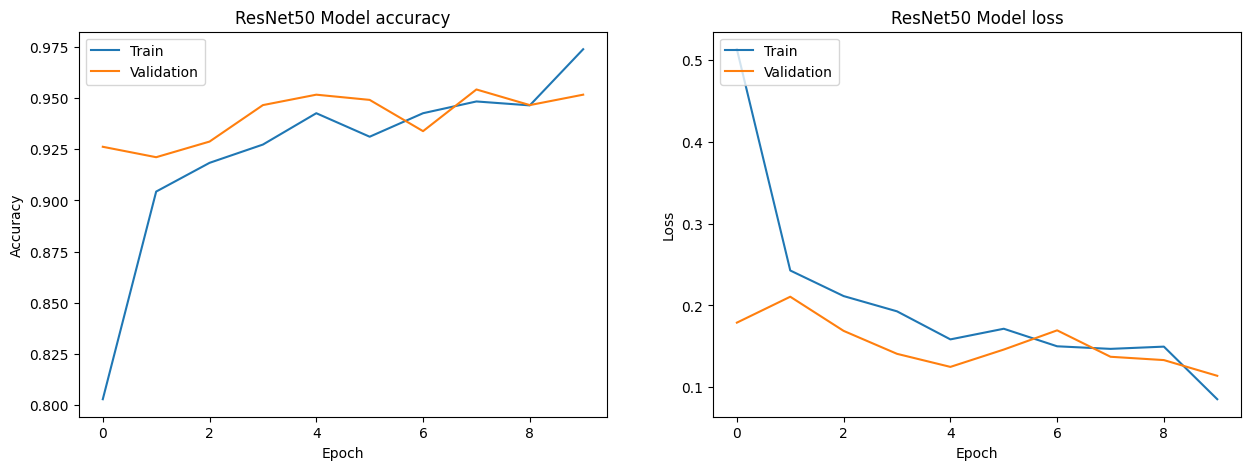

In [13]:
# Evaluate the model
loss, accuracy = resnet_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)

# Access history directly from the history object
plt.plot(resnet_history.history['accuracy'])
plt.plot(resnet_history.history['val_accuracy'])
plt.title('ResNet50 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(resnet_history.history['loss'])
plt.plot(resnet_history.history['val_loss'])
plt.title('ResNet50 Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 461ms/step


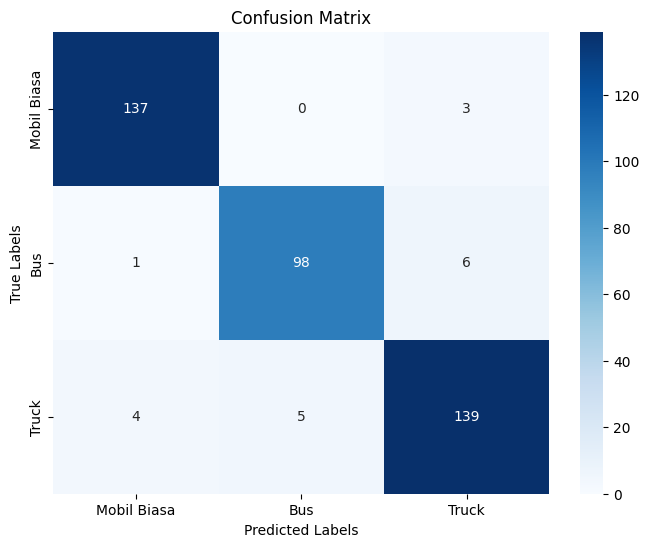

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = resnet_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Mobil Biasa', 'Bus', 'Truck'],
            yticklabels=['Mobil Biasa', 'Bus', 'Truck'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [15]:
print(classification_report(y_test, y_pred_classes, target_names=['Mobil Biasa', 'Bus', 'Truck']))

              precision    recall  f1-score   support

 Mobil Biasa       0.96      0.98      0.97       140
         Bus       0.95      0.93      0.94       105
       Truck       0.94      0.94      0.94       148

    accuracy                           0.95       393
   macro avg       0.95      0.95      0.95       393
weighted avg       0.95      0.95      0.95       393



# VGG19

In [16]:
# VGG16
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
vgg19_model = Sequential()
vgg19_model.add(base_model)
vgg19_model.add(GlobalAveragePooling2D())
vgg19_model.add(Dense(256, activation='relu'))
vgg19_model.add(Dropout(0.5))
vgg19_model.add(Dense(3, activation='softmax'))  # 3 output classes

# Compile the vgg19_model
vgg19_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train the model
vgg_history = vgg19_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 47s 597ms/step - accuracy: 0.6122 - loss: 2.4795 - val_accuracy: 0.8830 - val_loss: 0.5151
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 58s 416ms/step - accuracy: 0.8481 - loss: 0.5045 - val_accuracy: 0.9033 - val_loss: 0.3942
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 423ms/step - accuracy: 0.9030 - loss: 0.3153 - val_accuracy: 0.9160 - val_loss: 0.2357
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 427ms/step - accuracy: 0.8930 - loss: 0.3005 - val_accuracy: 0.9084 - val_loss: 0.2736
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 408ms/step - accuracy: 0.9111 - loss: 0.2335 - val_accuracy: 0.9237 - val_loss: 0.2362
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 24s 441ms/step - accuracy: 0.9087 - loss: 0.2683 - val_accuracy: 0.9237 - val_loss: 0.2332
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 22s 416ms/step - accuracy: 0.8962 - loss: 0.2391 - val_accuracy: 0.9160 - val_loss: 0.2339
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 23s 416ms/step - accuracy: 0.9311 - loss: 0.2233 - val_accuracy: 0.933

In [18]:
# Evaluate the model
loss, accuracy = vgg19_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.2658
Test Accuracy: 0.9313


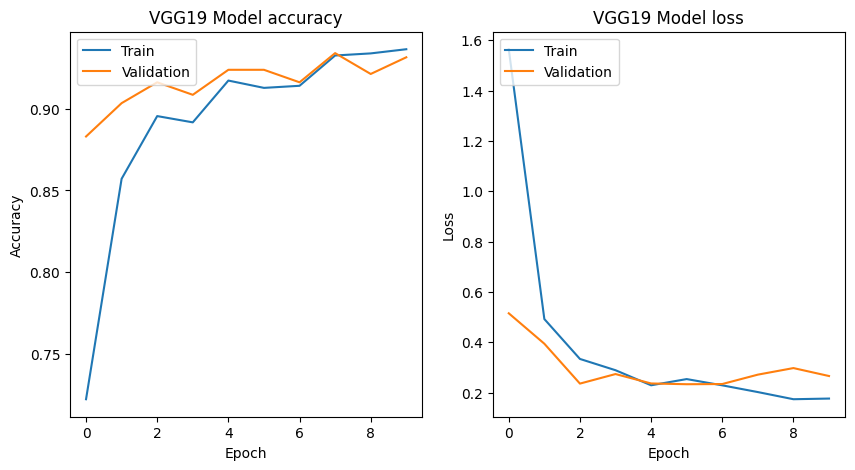

In [19]:
# Plot training & validation accuracy values for VGG19
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(vgg_history.history['accuracy']) # Access history from vgg19_model
plt.plot(vgg_history.history['val_accuracy']) # Access history from vgg19_model
plt.title('VGG19 Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values for VGG19
plt.subplot(1, 2, 2)
plt.plot(vgg_history.history['loss']) # Access history from vgg19_model
plt.plot(vgg_history.history['val_loss']) # Access history from vgg19_model
plt.title('VGG19 Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step


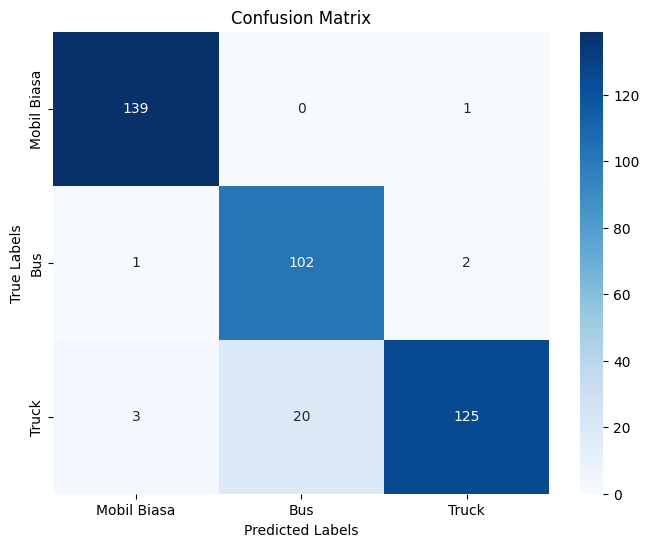

              precision    recall  f1-score   support

 Mobil Biasa       0.97      0.99      0.98       140
         Bus       0.84      0.97      0.90       105
       Truck       0.98      0.84      0.91       148

    accuracy                           0.93       393
   macro avg       0.93      0.94      0.93       393
weighted avg       0.94      0.93      0.93       393



In [20]:
# Make predictions on the test set
y_pred = vgg19_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Mobil Biasa', 'Bus', 'Truck'],
            yticklabels=['Mobil Biasa', 'Bus', 'Truck'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
print(classification_report(y_test, y_pred_classes, target_names=['Mobil Biasa', 'Bus', 'Truck']))

# CNN

In [21]:
# CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 372ms/step - accuracy: 0.3134 - loss: 205.5164 - val_accuracy: 0.3639 - val_loss: 1.0818
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 334ms/step - accuracy: 0.3609 - loss: 1.0973 - val_accuracy: 0.3384 - val_loss: 1.0810
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 18s 328ms/step - accuracy: 0.3680 - loss: 1.0831 - val_accuracy: 0.3232 - val_loss: 1.0879
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 336ms/step - accuracy: 0.3759 - loss: 1.0939 - val_accuracy: 0.2824 - val_loss: 1.0891
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 334ms/step - accuracy: 0.3744 - loss: 1.0915 - val_accuracy: 0.2952 - val_loss: 1.0864
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 325ms/step - accuracy: 0.3865 - loss: 1.0851 - val_accuracy: 0.4478 - val_loss: 1.0605
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 21s 327ms/step - accuracy: 0.4201 - loss: 1.0839 - val_accuracy: 0.3690 - val_loss: 1.0627
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 20s 323ms/step - accuracy: 0.4237 - loss: 1.0882 - val_accuracy: 0.3

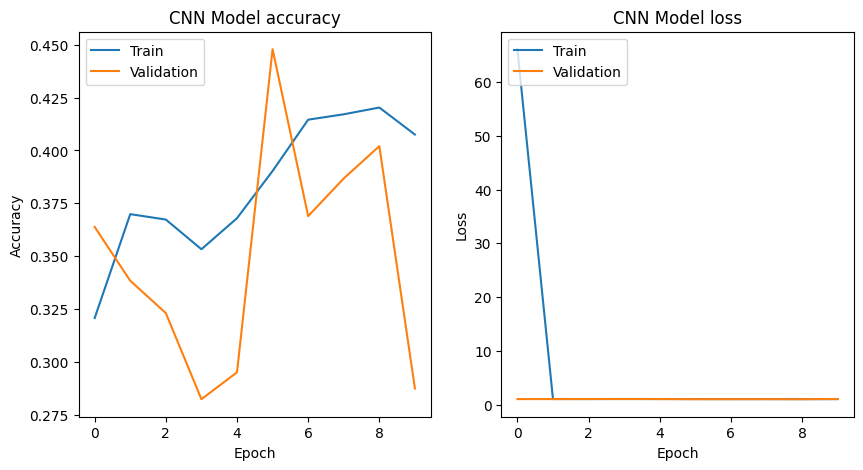

In [23]:
# Plot training & validation accuracy values for CNN
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(model.history.history['accuracy'])  # Access history from model
plt.plot(model.history.history['val_accuracy'])  # Access history from model
plt.title('CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values for CNN
plt.subplot(1, 2, 2)
plt.plot(model.history.history['loss'])  # Access history from model
plt.plot(model.history.history['val_loss'])  # Access history from model
plt.title('CNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Test Loss: 1.0962
Test Accuracy: 0.2875
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


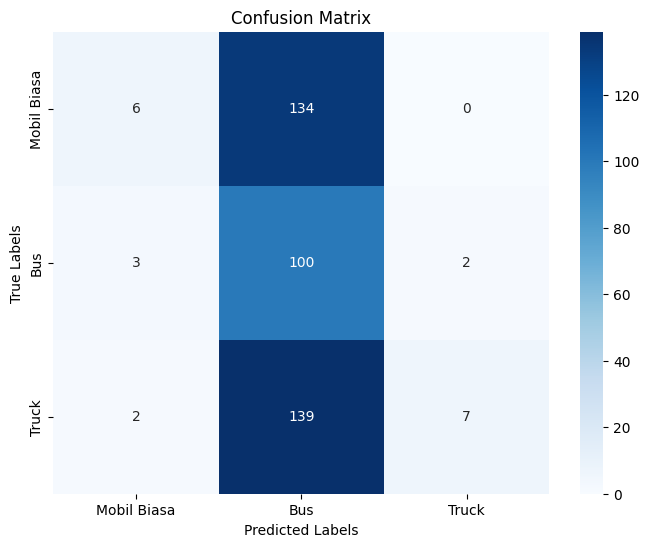

              precision    recall  f1-score   support

 Mobil Biasa       0.55      0.04      0.08       140
         Bus       0.27      0.95      0.42       105
       Truck       0.78      0.05      0.09       148

    accuracy                           0.29       393
   macro avg       0.53      0.35      0.20       393
weighted avg       0.56      0.29      0.17       393



In [24]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Mobil Biasa', 'Bus', 'Truck'],
            yticklabels=['Mobil Biasa', 'Bus', 'Truck'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred_classes, target_names=['Mobil Biasa', 'Bus', 'Truck']))

In [25]:
resnet_model.save('resnet50_model.h5')

vgg19_model.save('vgg19_model.h5')

model.save('cnn_model.h5')

# Testing

Testing Results for ResNet50:
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 330ms/step
              precision    recall  f1-score   support

 Mobil Biasa       0.96      0.98      0.97       140
         Bus       0.95      0.93      0.94       105
       Truck       0.94      0.94      0.94       148

    accuracy                           0.95       393
   macro avg       0.95      0.95      0.95       393
weighted avg       0.95      0.95      0.95       393



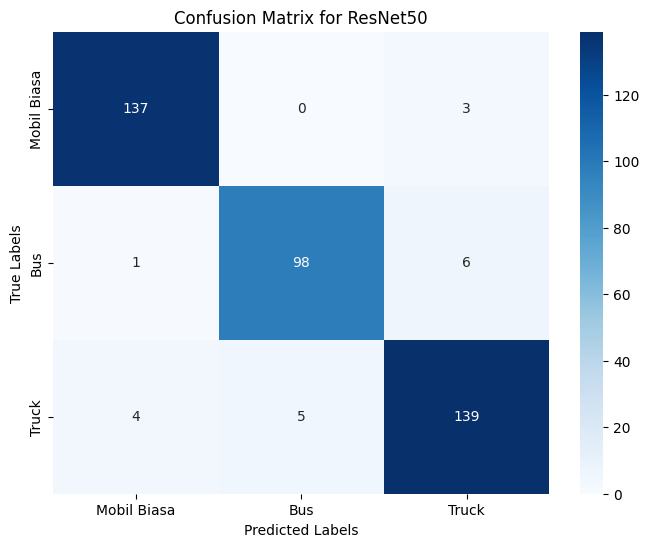

Testing Results for VGG19:
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step
              precision    recall  f1-score   support

 Mobil Biasa       0.97      0.99      0.98       140
         Bus       0.84      0.97      0.90       105
       Truck       0.98      0.84      0.91       148

    accuracy                           0.93       393
   macro avg       0.93      0.94      0.93       393
weighted avg       0.94      0.93      0.93       393



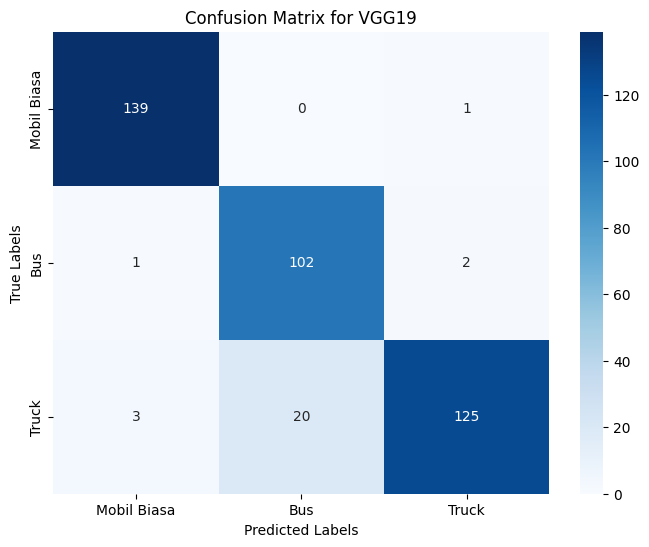

Testing Results for CNN:
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
              precision    recall  f1-score   support

 Mobil Biasa       0.55      0.04      0.08       140
         Bus       0.27      0.95      0.42       105
       Truck       0.78      0.05      0.09       148

    accuracy                           0.29       393
   macro avg       0.53      0.35      0.20       393
weighted avg       0.56      0.29      0.17       393



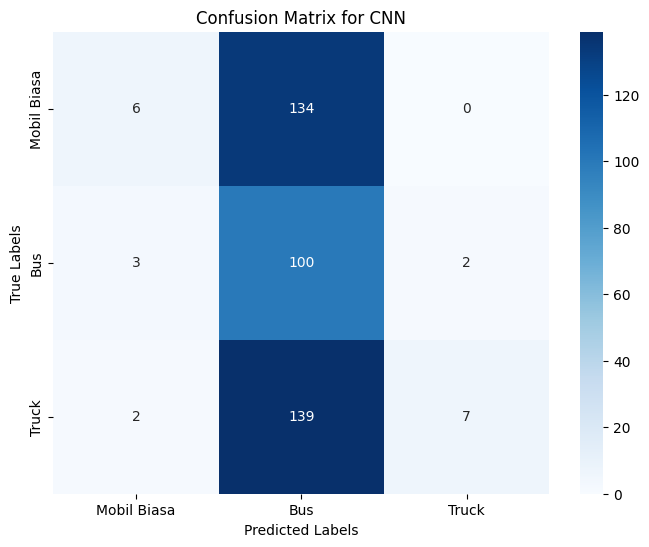

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the saved models
resnet_model = tf.keras.models.load_model('resnet50_model.h5')
vgg19_model = tf.keras.models.load_model('vgg19_model.h5')
cnn_model = tf.keras.models.load_model('cnn_model.h5')

models = {
    "ResNet50": resnet_model,
    "VGG19": vgg19_model,
    "CNN": cnn_model
}

for model_name, model in models.items():
  print(f"Testing Results for {model_name}:")
  y_pred = model.predict(X_test)
  y_pred_classes = np.argmax(y_pred, axis=1)

  print(classification_report(y_test, y_pred_classes, target_names=['Mobil Biasa', 'Bus', 'Truck']))

  cm = confusion_matrix(y_test, y_pred_classes)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
              xticklabels=['Mobil Biasa', 'Bus', 'Truck'],
              yticklabels=['Mobil Biasa', 'Bus', 'Truck'])
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  plt.title(f"Confusion Matrix for {model_name}")
  plt.show()

In [42]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  try:
    img = Image.open(fn)
    img = img.convert("RGB")
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)

    for model_name, model in models.items():
      predictions = model.predict(img_array)
      predicted_class = np.argmax(predictions[0])

      class_labels = ['Mobil Biasa', 'Bus', 'Truck']
      predicted_label = class_labels[predicted_class]
      print(f"Model: {model_name}, Prediction: {predicted_label}")

  except Exception as e:
    print(f"Error processing image {fn}: {e}")

Saving tes_bus.jpg to tes_bus (1).jpg
User uploaded file "tes_bus (1).jpg" with length 90845 bytes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Model: ResNet50, Prediction: Bus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Model: VGG19, Prediction: Bus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model: CNN, Prediction: Bus
